# **AICP Internship Task Week 5**

In [ ]:
# Importing required libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud

# Setting default plotly template
pio.templates.default = "plotly_white"

# Read CSV file
df = pd.read_csv('Instagram data.csv', encoding='latin-1')




## Show column names and have a look at their info

In [ ]:
print("Column names:")
print(df.columns)
print("\nInfo about columns:")
print(df.info())

Column names:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

Info about columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null

## Show the descriptive statistics of the data.

In [ ]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.08920

## Check if your data contains any missing values

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


## Distribution of the Impressions

In [ ]:
impressions_distribution = px.histogram(df, x='Impressions', title='Distribution of Impressions')
impressions_distribution.show()

## Number of impressions on each post over time

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Impressions'],
                    mode='lines',
                    name='Impressions'))

fig.update_layout(title='Number of Impressions Over Time',
                  xaxis_title='Time (Index)',
                  yaxis_title='Impressions')

fig.show()

##  Look at all the metrics like Likes, Saves, and Follows from each post over time

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Likes'], mode='lines', name='Likes'))
fig.add_trace(go.Scatter(x=df.index, y=df['Saves'], mode='lines', name='Saves'))
fig.add_trace(go.Scatter(x=df.index, y=df['Follows'], mode='lines', name='Follows'))

fig.update_layout(title='Metrics Over Time',
                  xaxis_title='Time (Index)',
                  yaxis_title='Count')

fig.show()

## Look at the distribution of reach from different sources

In [ ]:
reach_sources = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()

# Create a pie chart
fig = px.pie(values=reach_sources, names=reach_sources.index, title='Distribution of Reach from Different Sources')

# Show plot
fig.show()

## Look at the distribution of engagement sources

In [ ]:
import plotly.express as px

engagement_sources = df[['Likes','Saves', 'Comments', 'Shares']].sum()

fig = px.pie(values=engagement_sources, names=engagement_sources.index, title='Distribution of Engagement Sources')

fig.show()

## Look at the relationship between the number of profile visits and follows

In [ ]:
fig = px.scatter(df, x='Profile Visits', y='Follows', trendline='ols', title='Relationship between Profile Visits and Follows')

fig.show()

##  Look at the type of hashtags used in the posts using a wordcloud

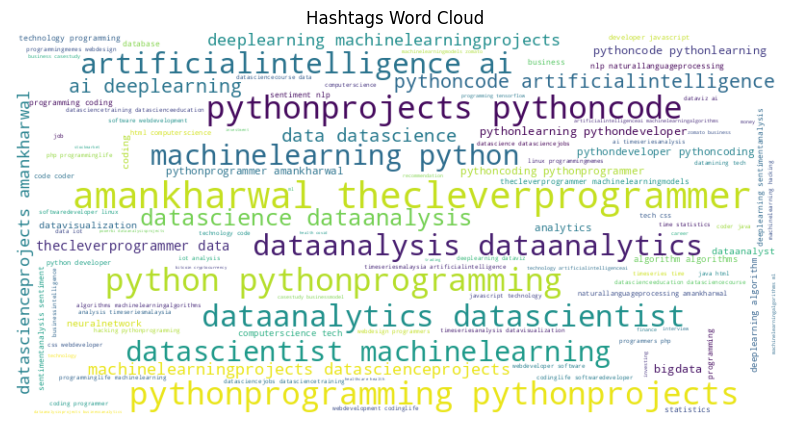

In [ ]:
import matplotlib.pyplot as plt
all_hashtags = ' '.join(df['Hashtags'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Hashtags Word Cloud')
plt.axis('off')
plt.show()

## Look at the correlation between all the features

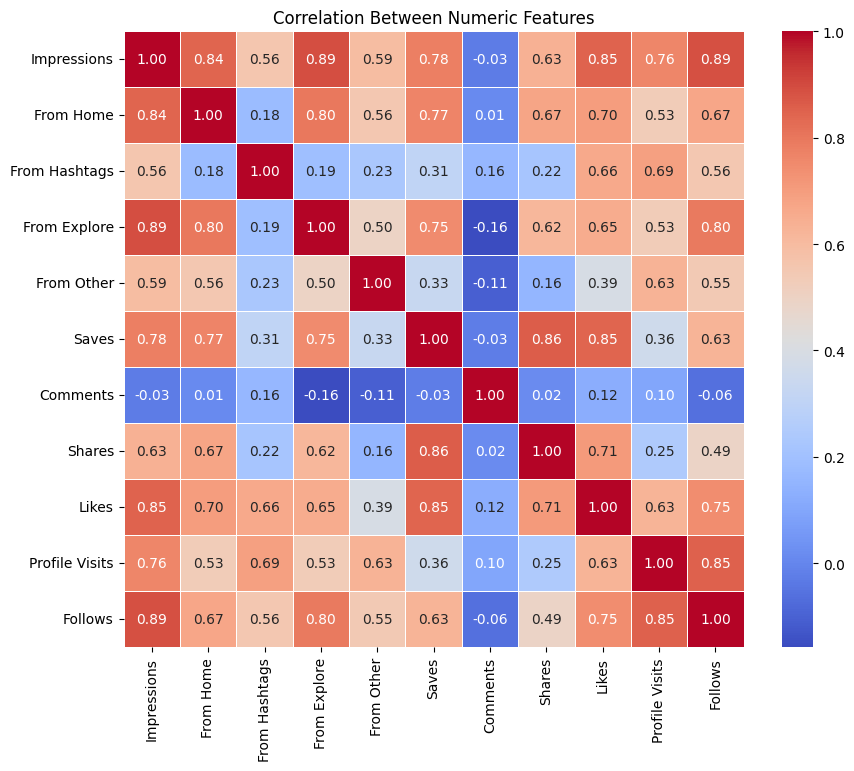

In [ ]:
import seaborn as sns

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Numeric Features')
plt.show()

## Look at the distribution of hashtags to see which hashtag is used the most in all the posts

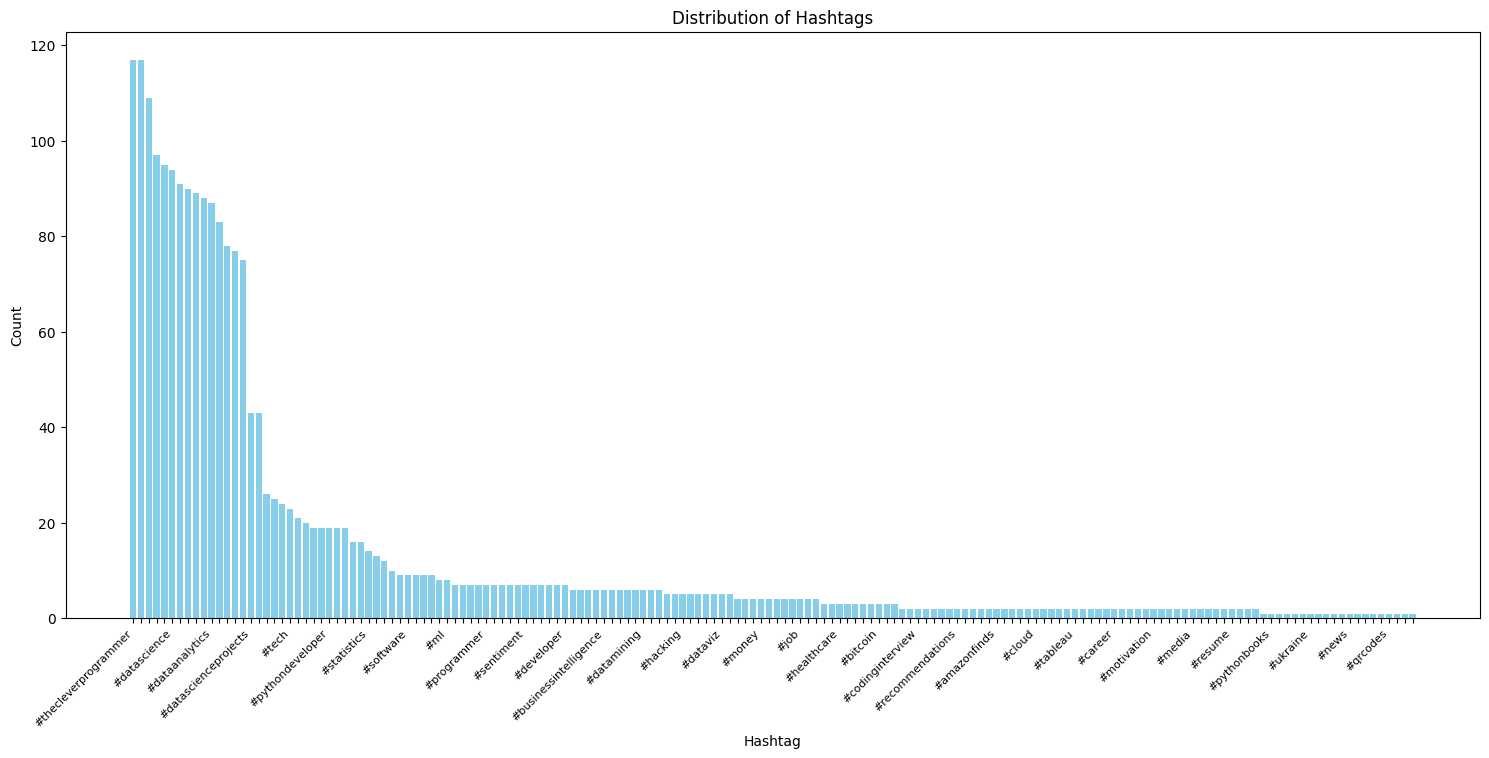

In [ ]:
from collections import Counter

# Combine all hashtags into a single string
all_hashtags = ' '.join(df['Hashtags'])

# Split the hashtags into individual words
hashtags_list = all_hashtags.split()

# Count the frequency of each hashtag
hashtags_counts = Counter(hashtags_list)

# Convert the counts to a DataFrame
hashtags_df = pd.DataFrame.from_dict(hashtags_counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtag', 'Count']

# Sort the DataFrame by count in descending order
hashtags_df = hashtags_df.sort_values(by='Count', ascending=False)

# Plot the distribution of hashtags
plt.figure(figsize=(15, 8))  # Increase figure size
plt.bar(hashtags_df['Hashtag'], hashtags_df['Count'], color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Distribution of Hashtags')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate labels and set fontsize
plt.tight_layout()

# Display every nth label on x-axis
n = 5
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.show()


## Look at the distribution of likes and impressions received from the presence of each hashtag on the post

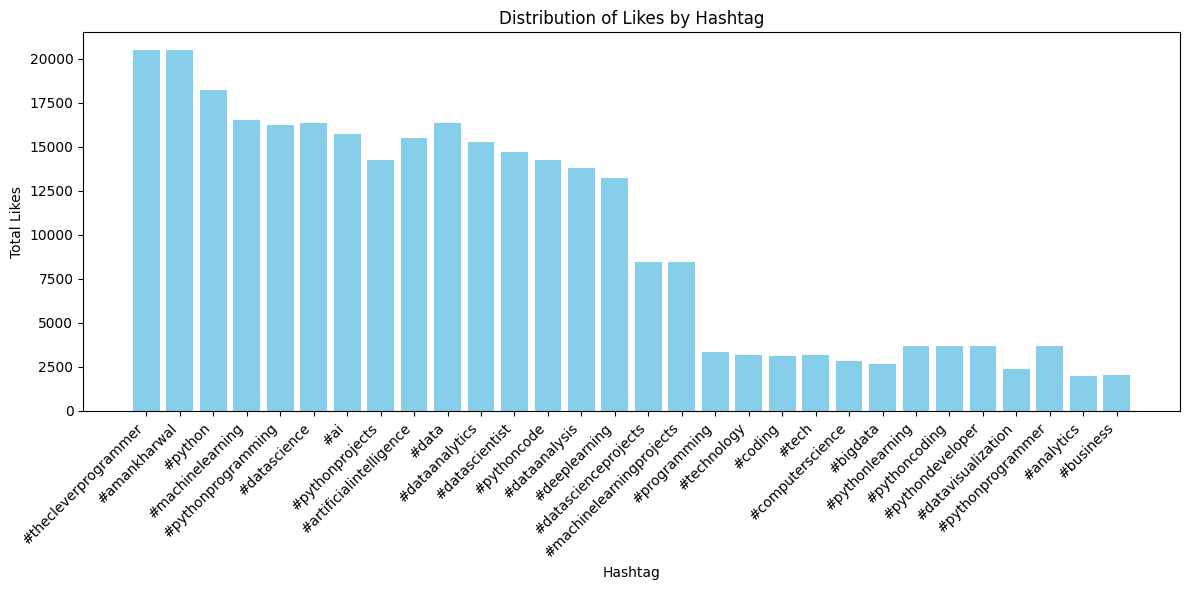

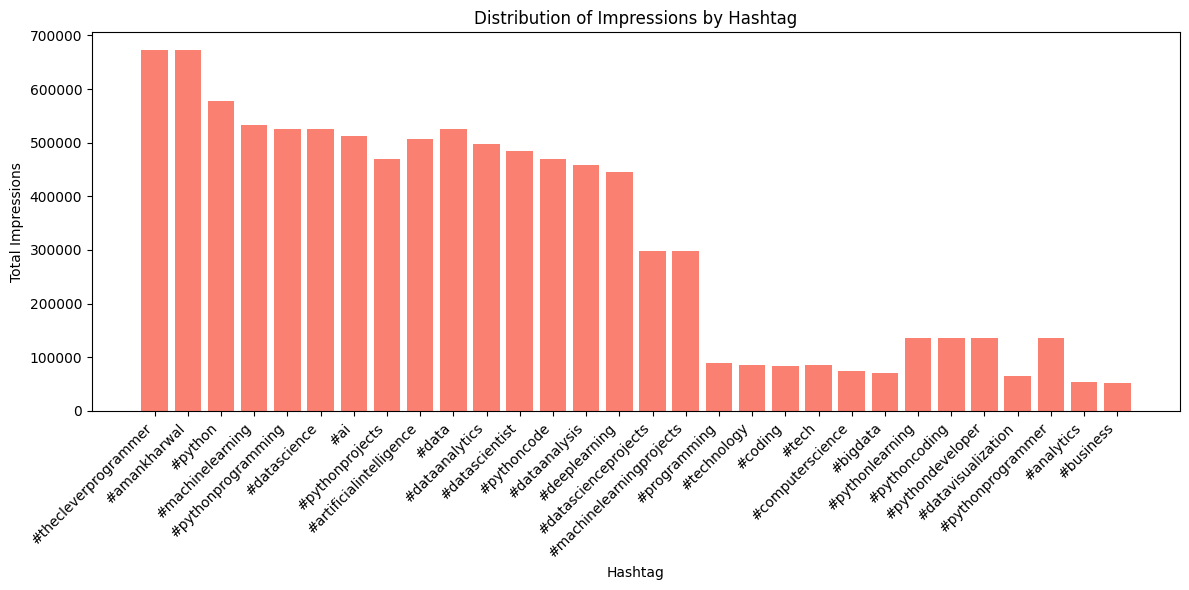

In [ ]:
# Plot the distribution of likes for each hashtag
plt.figure(figsize=(12, 6))
for hashtag in hashtags_df['Hashtag'][:30]:  # Plot only the top 30 hashtags
    hashtag_data = df[df['Hashtags'].str.contains(hashtag)]  # Filter data for the current hashtag
    plt.bar(hashtag, hashtag_data['Likes'].sum(), color='skyblue')

plt.xlabel('Hashtag')
plt.ylabel('Total Likes')
plt.title('Distribution of Likes by Hashtag')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution of impressions for each hashtag
plt.figure(figsize=(12, 6))
for hashtag in hashtags_df['Hashtag'][:30]:  # Plot only the top 30 hashtags
    hashtag_data = df[df['Hashtags'].str.contains(hashtag)]  # Filter data for the current hashtag
    plt.bar(hashtag, hashtag_data['Impressions'].sum(), color='salmon')

plt.xlabel('Hashtag')
plt.ylabel('Total Impressions')
plt.title('Distribution of Impressions by Hashtag')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary as per my observation

**Likes by Hashtag:**

Likes vary across hashtags.
Some hashtags get more likes than others.

**Impressions by Hashtag:**

Impressions also vary across hashtags.
Certain hashtags attract more attention.

**Visualization Quality:**

Graphs effectively show likes and impressions for each hashtag.
Labels are rotated for better readability.

**Top Hashtags:**

Analysis focuses on the top 30 hashtags.
Provides insights into engagement for popular hashtags.

**Next Steps:**

Explore why some hashtags get more engagement.
Use insights to improve social media strategies.
